In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

econ = pd.read_csv('cleaned_dataframes/df_m_median.csv') #using median even though rf is used for modeling so that categorical data is not dummified
econ.head()

,fips,state_name,county,lat,lon,total_population,area_sqmi,population_density_per_sqmi,percent_fair_or_poor_health,average_number_of_mentally_unhealthy_days,...,percentile_rank_social_vulnerability,pct_overall_pov_19,fi_rate_18,ch_fi_rate_18,cpm_18,state_abr,percent_of_adults_with_less_than_high_school_diploma,percent_of_adults_with_high_school_diploma_only,percent_of_adults_completing_some_college_or_associate_degree,percent_of_adults_with_bachelor_degree_or_higher
0,1001,Alabama,Autauga,32.534928,-86.642748,55049,594.446120,92.605533,20.882987,4.654031,...,0.3773,12.1,15.6,21.4,3.33,AL,11.5,33.6,28.4,26.6
1,1003,Alabama,Baldwin,30.727489,-87.722575,199510,1589.807425,125.493187,17.509134,4.304056,...,0.2757,10.1,12.9,16.9,3.58,AL,9.2,27.7,31.3,31.9
2,1005,Alabama,Barbour,31.869589,-85.393213,26614,884.875776,30.076538,29.591802,5.185594,...,0.9847,27.1,21.9,32.0,3.12,AL,26.8,35.6,26.0,11.6
3,1007,Alabama,Bibb,32.998634,-87.126480,22572,622.582355,36.255444,19.439724,4.551699,...,0.5737,20.3,15.1,20.9,2.94,AL,20.9,44.9,23.8,10.4
4,1009,Alabama,Blount,33.980878,-86.567383,57704,644.806508,89.490412,21.745293,4.891455,...,0.4986,16.3,13.6,19.1,3.14,AL,19.5,33.4,34.0,13.1


In [2]:
econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 60 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   fips                                                           3140 non-null   int64  
 1   state_name                                                     3140 non-null   object 
 2   county                                                         3140 non-null   object 
 3   lat                                                            3140 non-null   float64
 4   lon                                                            3140 non-null   float64
 5   total_population                                               3140 non-null   int64  
 6   area_sqmi                                                      3140 non-null   float64
 7   population_density_per_sqmi                                 

# EDA
Explore the features of the dataset

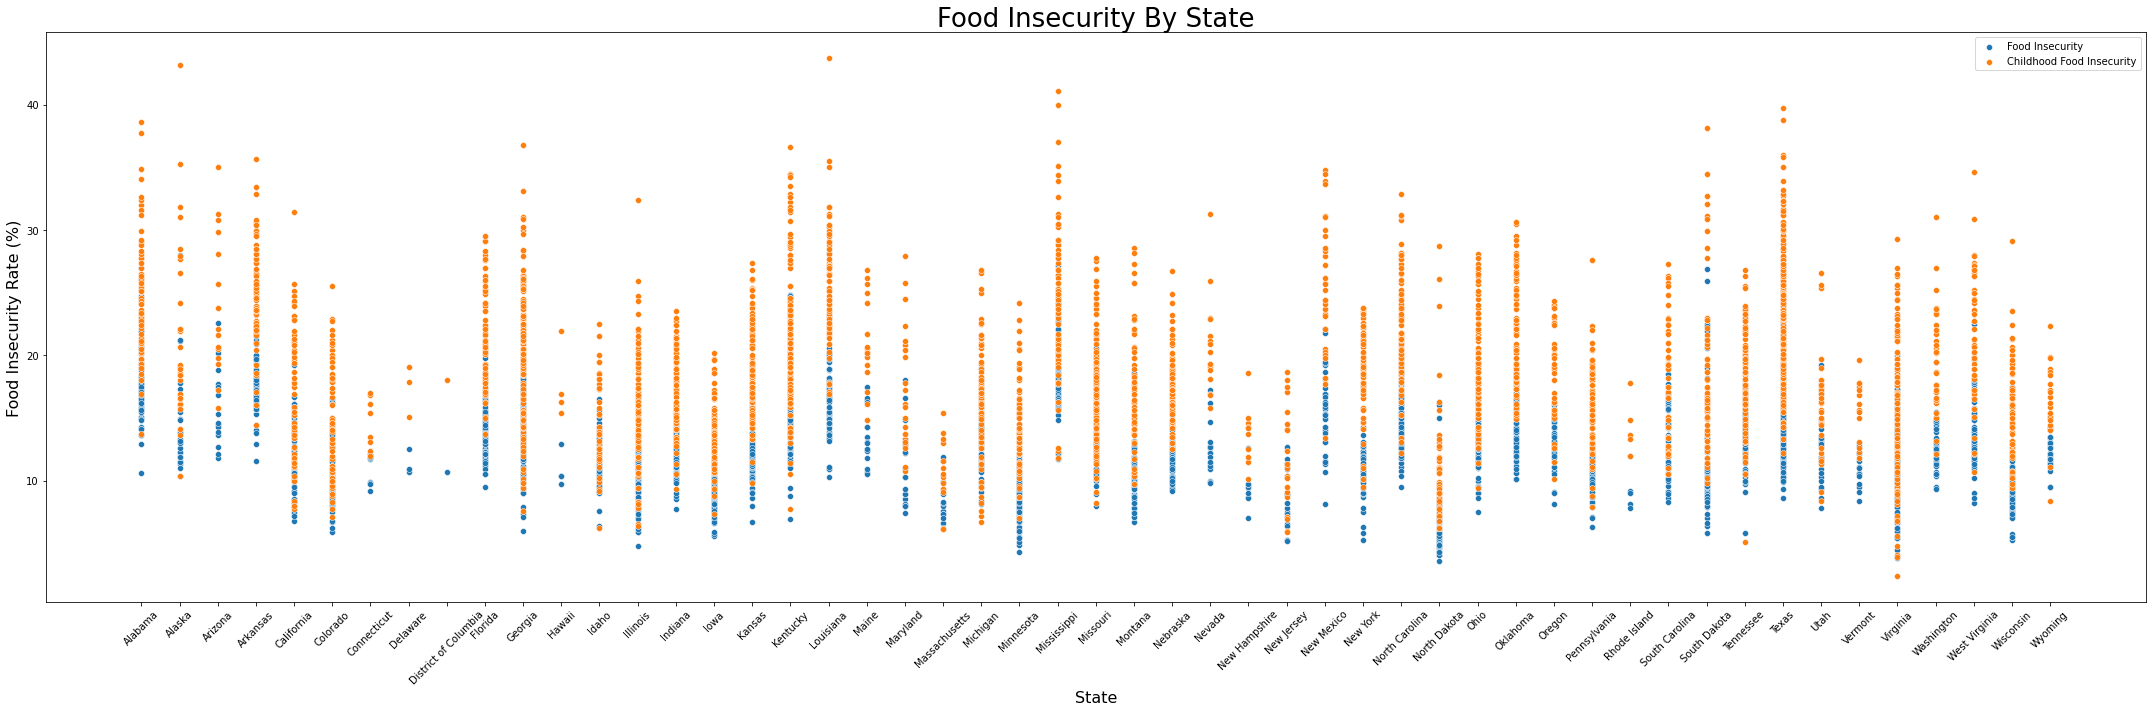

In [3]:
# Overlay scatterplots - blue is general rate, red is child rate
plt.figure(figsize = (30, 10))
sns.scatterplot(data = econ, x = 'state_name', y = 'fi_rate_18', palette = 'Blues')
sns.scatterplot(data = econ, x = 'state_name', y = 'ch_fi_rate_18', palette = 'Reds')

plt.title('Food Insecurity By State', size = 26)
plt.xlabel('State', size = 16)
plt.ylabel('Food Insecurity Rate (%)', size = 16)
plt.xticks(rotation = 45) # Credit to stackabuse - https://stackabuse.com/rotate-axis-labels-in-matplotlib/
plt.legend(labels = ['Food Insecurity', 'Childhood Food Insecurity'])

plt.tight_layout();

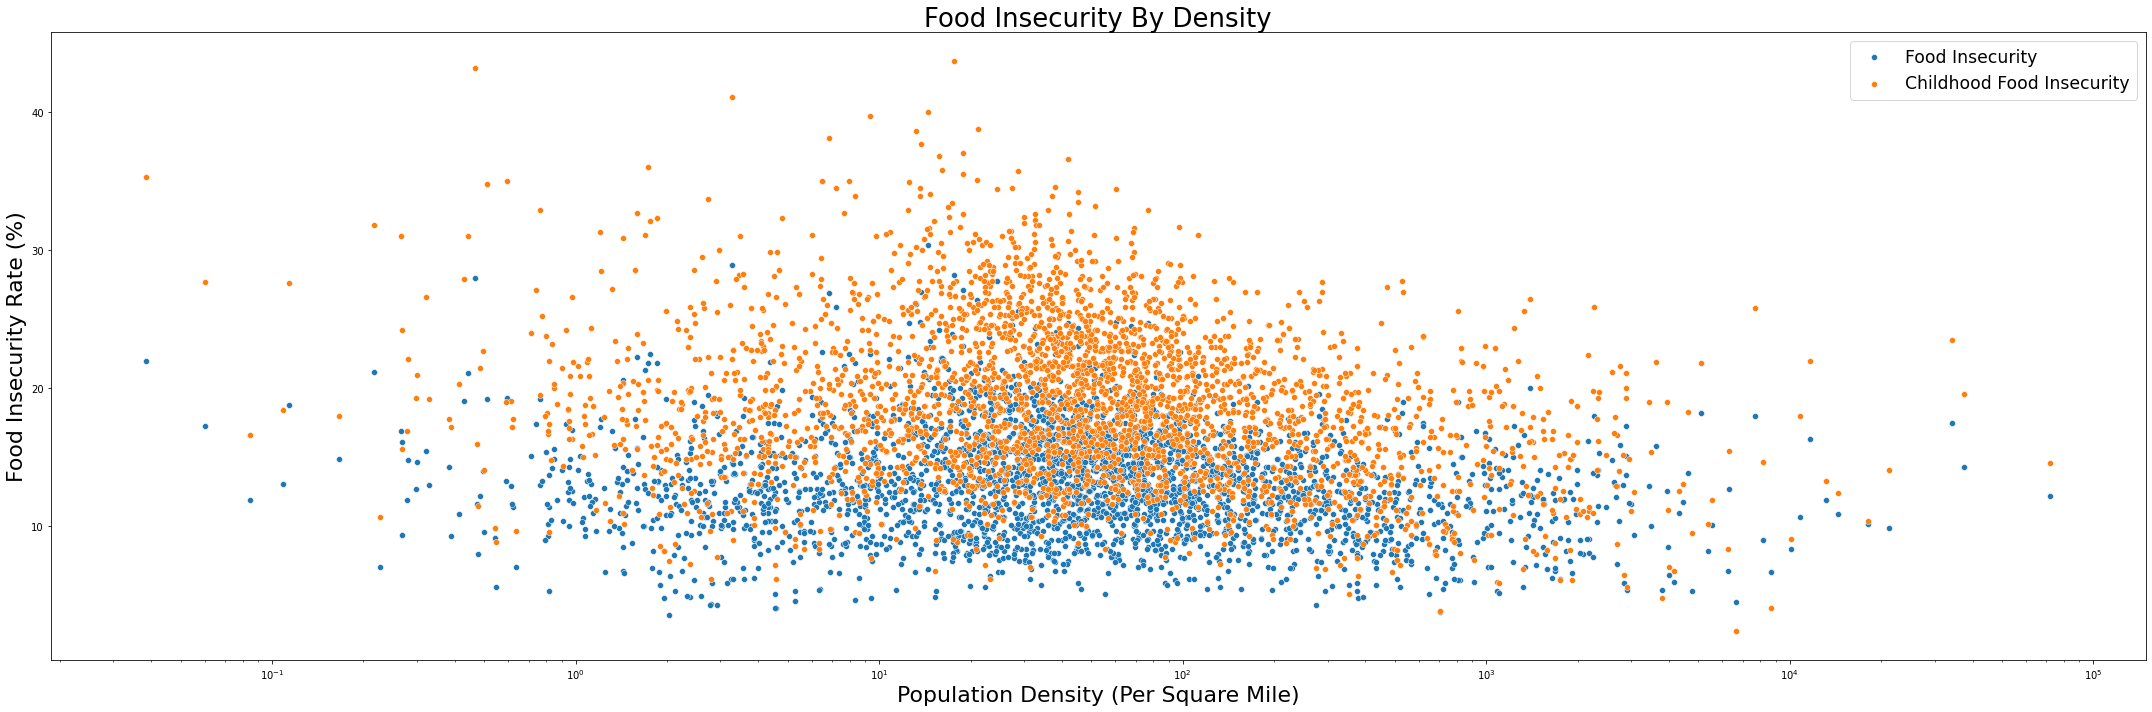

In [12]:
# Check food insecurity against density
plt.figure(figsize = (30, 10))
g = sns.scatterplot(data = econ, x = 'population_density_per_sqmi', y = 'fi_rate_18', palette = 'Blues')
g = sns.scatterplot(data = econ, x = 'population_density_per_sqmi', y = 'ch_fi_rate_18', palette = 'Reds')

plt.title('Food Insecurity By Density', size = 26)
plt.xlabel('Population Density (Per Square Mile)', size = 22)
plt.ylabel('Food Insecurity Rate (%)', size = 22)
g.set_xscale("log")
plt.legend(labels = ['Food Insecurity', 'Childhood Food Insecurity'], fontsize = 'xx-large')

plt.tight_layout();

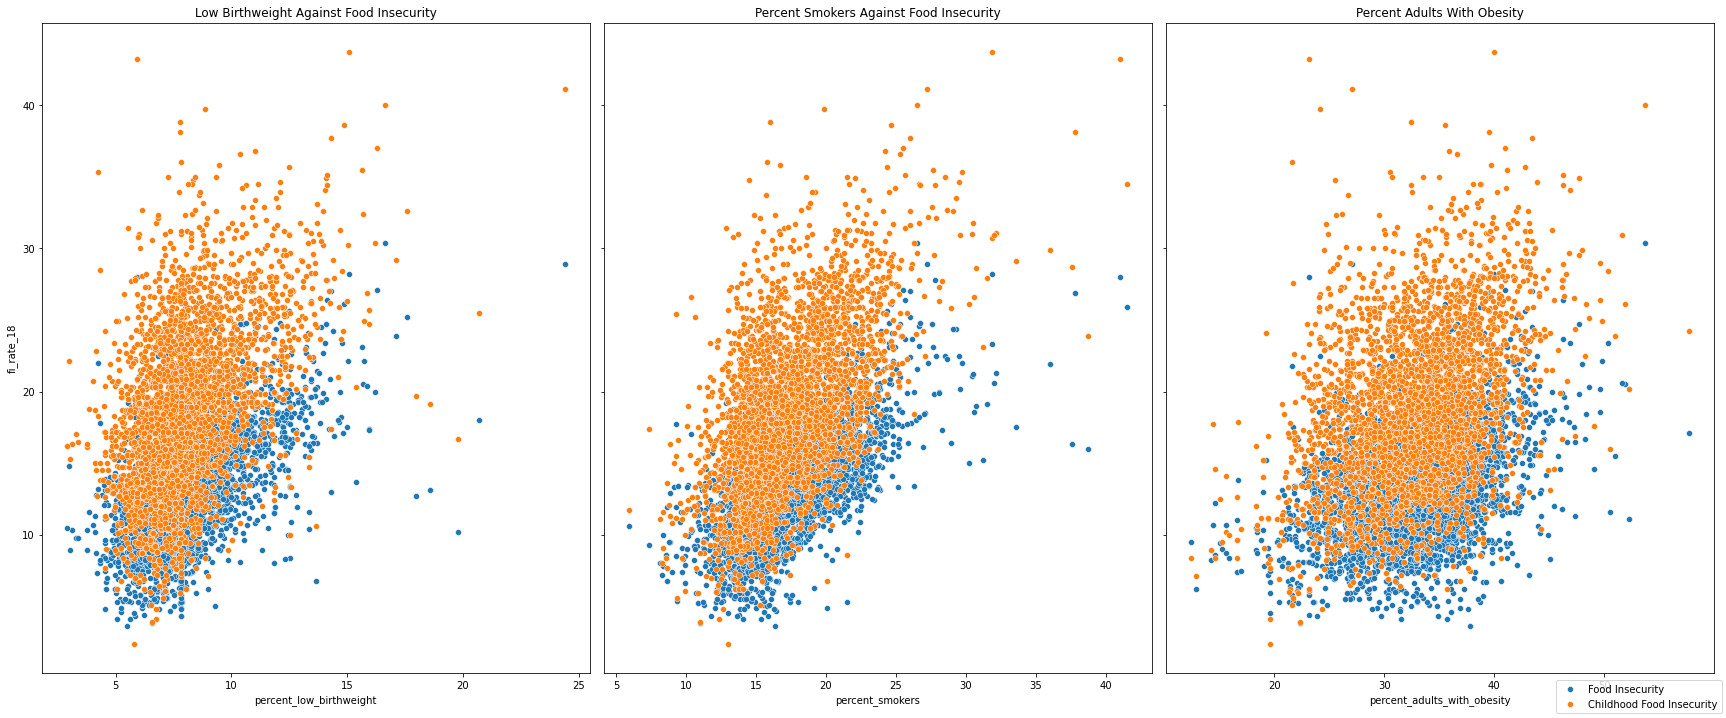

In [5]:
# Health Factors Against Food Insecurity
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24, 10), sharey = True)

g = sns.scatterplot(data = econ, x = 'percent_low_birthweight', y = 'fi_rate_18', palette = 'Blues', ax = ax1)
g = sns.scatterplot(data = econ, x = 'percent_low_birthweight', y = 'ch_fi_rate_18', palette = 'Reds', ax = ax1)

h = sns.scatterplot(data = econ, x = 'percent_smokers', y = 'fi_rate_18', palette = 'Blues', ax = ax2)
h = sns.scatterplot(data = econ, x = 'percent_smokers', y = 'ch_fi_rate_18', palette = 'Reds', ax = ax2)

i = sns.scatterplot(data = econ, x = 'percent_adults_with_obesity', y = 'fi_rate_18', palette = 'Blues', ax = ax3)
i = sns.scatterplot(data = econ, x = 'percent_adults_with_obesity', y = 'ch_fi_rate_18', palette = 'Reds', ax = ax3)

g.title.set_text('Low Birthweight Against Food Insecurity')
h.title.set_text('Percent Smokers Against Food Insecurity')
i.title.set_text('Percent Adults With Obesity')
fig.legend(labels = ['Food Insecurity', 'Childhood Food Insecurity'], loc = 'lower right')

plt.tight_layout();

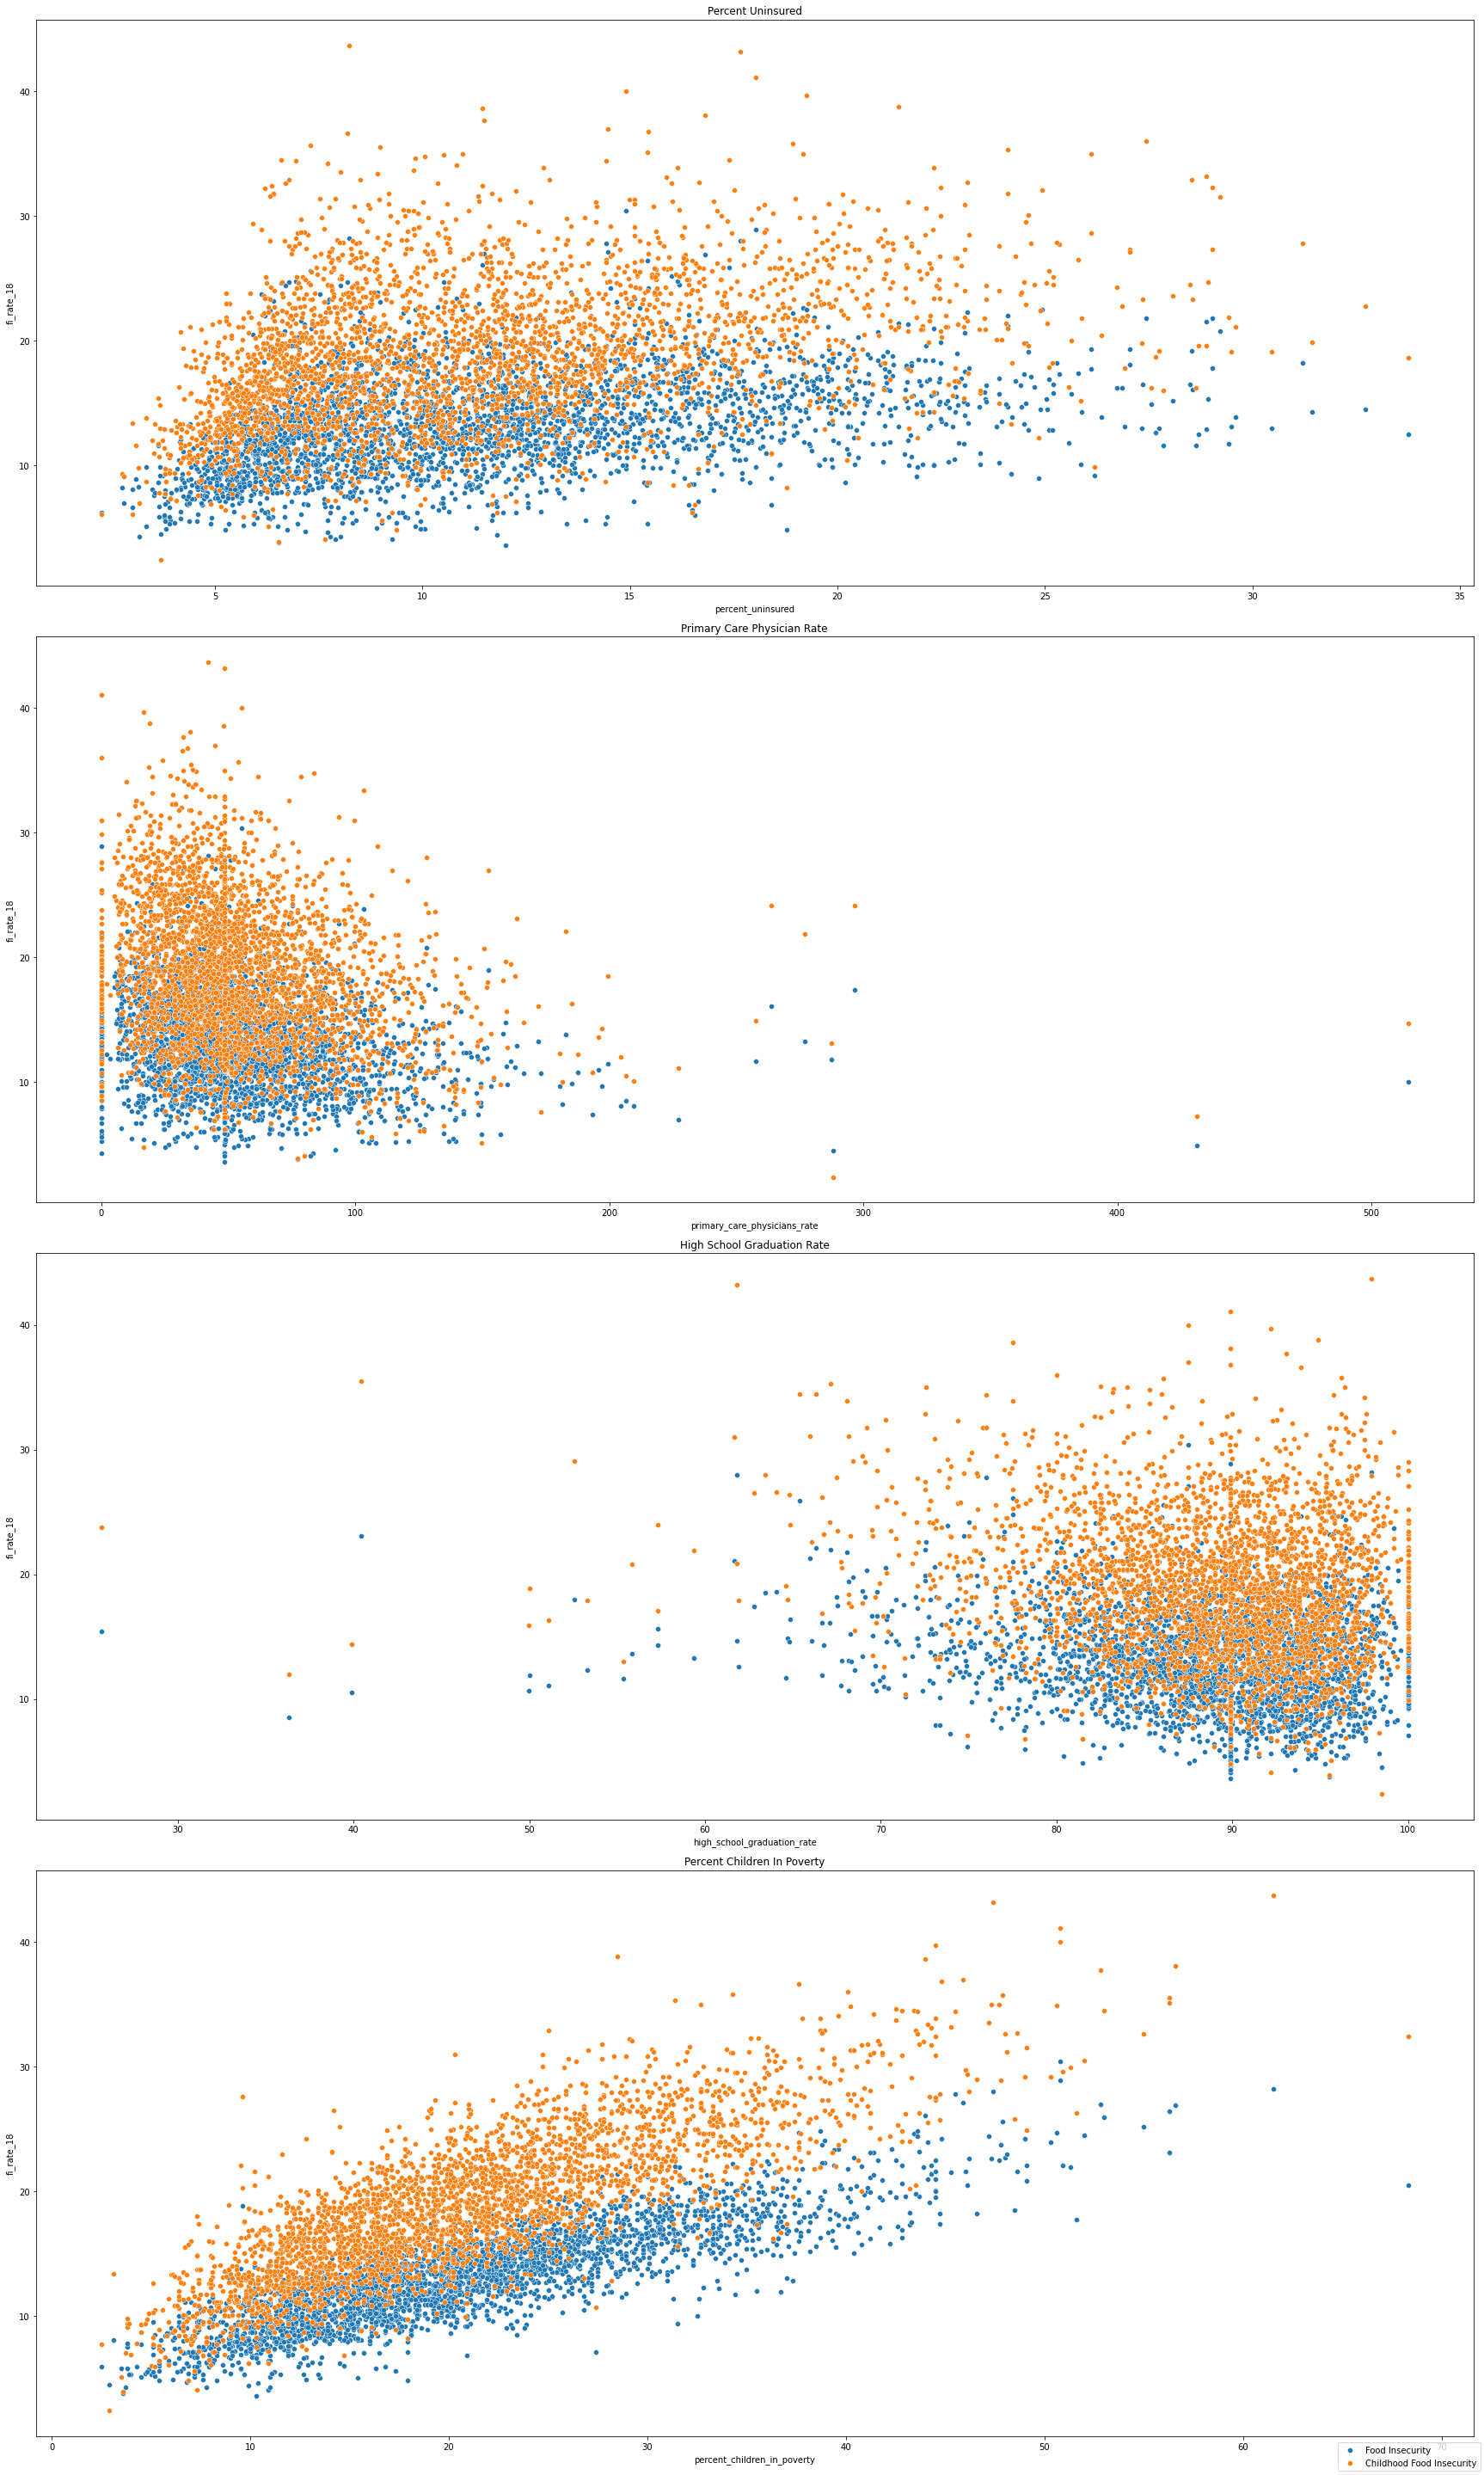

In [6]:
# Health Factors Against Food Insecurity
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (24, 40), sharey = True)

g = sns.scatterplot(data = econ, x = 'percent_uninsured', y = 'fi_rate_18', palette = 'Blues', ax = ax1)
g = sns.scatterplot(data = econ, x = 'percent_uninsured', y = 'ch_fi_rate_18', palette = 'Reds', ax = ax1)

h = sns.scatterplot(data = econ, x = 'primary_care_physicians_rate', y = 'fi_rate_18', palette = 'Blues', ax = ax2)
h = sns.scatterplot(data = econ, x = 'primary_care_physicians_rate', y = 'ch_fi_rate_18', palette = 'Reds', ax = ax2)

i = sns.scatterplot(data = econ, x = 'high_school_graduation_rate', y = 'fi_rate_18', palette = 'Blues', ax = ax3)
i = sns.scatterplot(data = econ, x = 'high_school_graduation_rate', y = 'ch_fi_rate_18', palette = 'Reds', ax = ax3)

j = sns.scatterplot(data = econ, x = 'percent_children_in_poverty', y = 'fi_rate_18', palette = 'Blues', ax = ax4)
j = sns.scatterplot(data = econ, x = 'percent_children_in_poverty', y = 'ch_fi_rate_18', palette = 'Reds', ax = ax4)

g.title.set_text('Percent Uninsured')
h.title.set_text('Primary Care Physician Rate')
i.title.set_text('High School Graduation Rate')
j.title.set_text('Percent Children In Poverty')
fig.legend(labels = ['Food Insecurity', 'Childhood Food Insecurity'], loc = 'lower right')

plt.tight_layout();

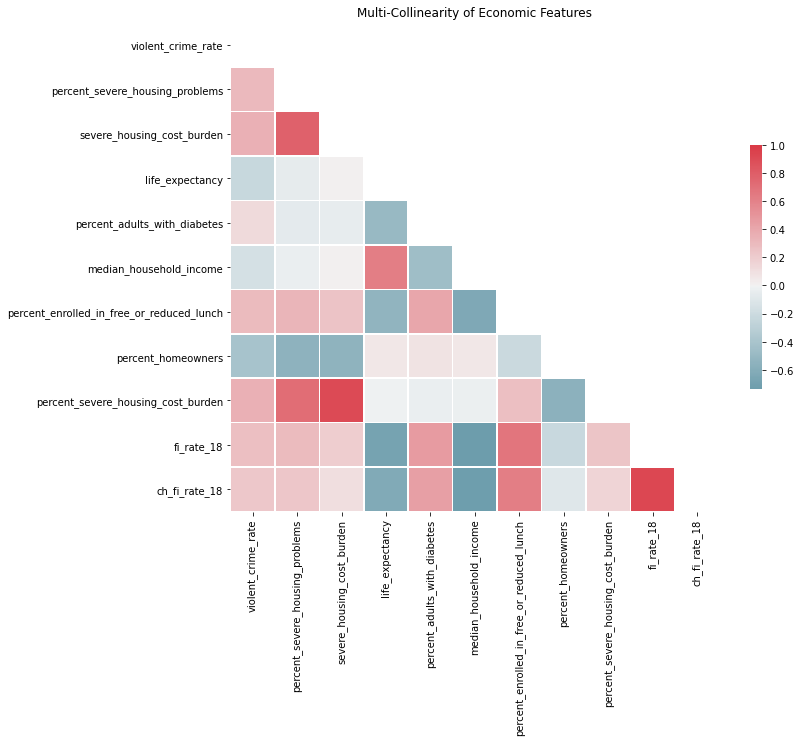

In [7]:
# Heatmap to explore how remaining suspected variables effect fi and chi_fi. Code borrowed from Connor Anderson Medium
econ_financial_demographics = econ[['violent_crime_rate', 'percent_severe_housing_problems', 'severe_housing_cost_burden',
                        'life_expectancy', 'percent_adults_with_diabetes', 'median_household_income',
                        'percent_enrolled_in_free_or_reduced_lunch', 'percent_homeowners', 'percent_severe_housing_cost_burden',
                        'fi_rate_18','ch_fi_rate_18']] # Creating a mask the size of our covariance matrix

corr = econ_financial_demographics.corr()

mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True # Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1,center = 0, square = True, 
            linewidth = .5, cbar_kws = {'shrink': .5}), ax.set_title('Multi-Collinearity of Economic Features');

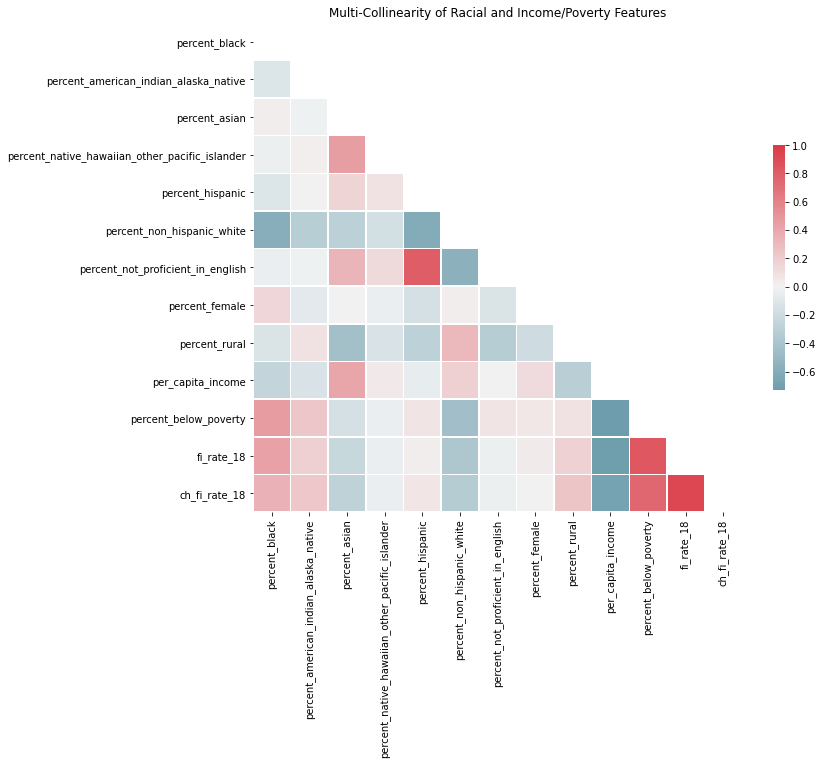

In [8]:
# Heatmap to explore how remaining suspected variables effect fi and chi_fi. Code borrowed from Connor Anderson Medium
econ_race_demos = econ[['percent_black', 'percent_american_indian_alaska_native', 'percent_asian',
                        'percent_native_hawaiian_other_pacific_islander', 'percent_hispanic', 'percent_non_hispanic_white',
                        'percent_not_proficient_in_english', 'percent_female', 'percent_rural', 'per_capita_income',
                        'percent_below_poverty', 'fi_rate_18','ch_fi_rate_18']] # Creating a mask the size of our covariance matrix

corr = econ_race_demos.corr()

mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True # Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1,center = 0, square = True, 
            linewidth = .5, cbar_kws = {'shrink': .5}), ax.set_title('Multi-Collinearity of Racial and Income/Poverty Features');